#Objective

The Objective of this Hyperparamter tuning is to know what machine learning model is fit for Prediction Model

#Import Libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input

#Import Datasets

In [3]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1haVIkVa4DHsXbiCG4Yy37wbNgwK59b3H4xUeYcZyg7U/edit#gid=1499193781'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(sheet_url_trf)

# Exploring the Dataframe

In [4]:
# Separate features and target
X = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = df['Exited']

In [5]:
# Perform one-hot encoding for categorical variables
X = pd.get_dummies(X, columns=['Geography', 'Gender'])

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Get the number of features
n_features = X_train_scaled.shape[1]

In [9]:
# Create the model
model = Sequential([
    Input(shape=(n_features,)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [10]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [12]:
# Train the model
history = model.fit(X_train_scaled, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7731 - loss: 0.5164 - val_accuracy: 0.8306 - val_loss: 0.4095
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8278 - loss: 0.4192 - val_accuracy: 0.8500 - val_loss: 0.3764
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8402 - loss: 0.3821 - val_accuracy: 0.8544 - val_loss: 0.3586
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8433 - loss: 0.3805 - val_accuracy: 0.8581 - val_loss: 0.3513
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8472 - loss: 0.3723 - val_accuracy: 0.8594 - val_loss: 0.3521
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8648 - loss: 0.3434 - val_accuracy: 0.8556 - val_loss: 0.3483
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8548 - loss: 0.3598 - val_accuracy: 0.8525 - val_loss: 0.3482
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8532 - loss: 0.3590 - val_accu

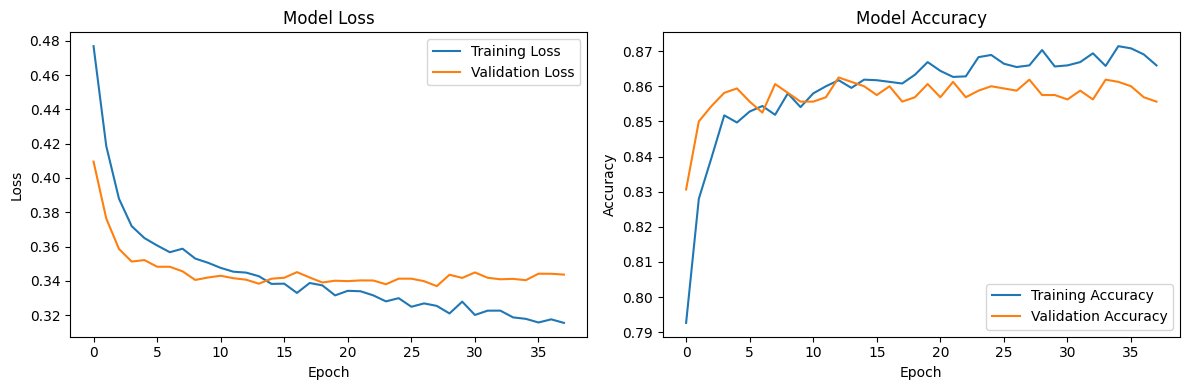

In [13]:
# Plot learning curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_classes = (y_pred > 0.5).astype(int)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [15]:
# Calculate additional metrics
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1607
           1       0.71      0.48      0.57       393

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.74      2000
weighted avg       0.85      0.86      0.85      2000



#Hyper Parameter Tuning

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.regularizers import l2

In [17]:
def build_model(neurons1, neurons2, neurons3, dropout_rate, learning_rate):
    model = Sequential([
        Input(shape=(X_train_scaled.shape[1],)),
        Dense(neurons1, activation='relu', kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(neurons2, activation='relu', kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(neurons3, activation='relu', kernel_regularizer=l2(0.01)),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=RMSprop(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [18]:
# Define hyperparameters to search
param_grid = {
    'neurons1': [32, 64, 128],
    'neurons2': [16, 32, 64],
    'neurons3': [8, 16, 32],
    'dropout_rate': [0.2, 0.3, 0.4],
    'learning_rate': [0.0001, 0.001, 0.01],
    'batch_size': [16, 32, 64],
    'epochs': [50, 100, 150]
}

# Number of random combinations to try
n_iter = 20

best_score = 0
best_params = {}
best_model = None
best_history = None

In [19]:
for i in range(n_iter):
    print(f"Iteration {i+1}/{n_iter}")

    # Randomly sample hyperparameters
    neurons1 = np.random.choice(param_grid['neurons1'])
    neurons2 = np.random.choice(param_grid['neurons2'])
    neurons3 = np.random.choice(param_grid['neurons3'])
    dropout_rate = np.random.choice(param_grid['dropout_rate'])
    learning_rate = np.random.choice(param_grid['learning_rate'])
    batch_size = np.random.choice(param_grid['batch_size'])
    epochs = np.random.choice(param_grid['epochs'])

    # Build and train the model
    model = build_model(neurons1, neurons2, neurons3, dropout_rate, learning_rate)
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(X_train_scaled, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_split=0.2,
                        callbacks=[early_stopping],
                        verbose=0)

    # Evaluate the model
    score = model.evaluate(X_test_scaled, y_test, verbose=0)[1]  # Get accuracy

    print(f"Score: {score}")

    if score > best_score:
        best_score = score
        best_params = {
            'neurons1': neurons1,
            'neurons2': neurons2,
            'neurons3': neurons3,
            'dropout_rate': dropout_rate,
            'learning_rate': learning_rate,
            'batch_size': batch_size,
            'epochs': epochs
        }
        best_model = model
        best_history = history

Iteration 1/20
Score: 0.862500011920929
Iteration 2/20
Score: 0.8565000295639038
Iteration 3/20
Score: 0.8414999842643738
Iteration 4/20
Score: 0.8600000143051147
Iteration 5/20
Score: 0.8610000014305115
Iteration 6/20
Score: 0.8289999961853027
Iteration 7/20
Score: 0.8550000190734863
Iteration 8/20
Score: 0.847000002861023
Iteration 9/20
Score: 0.8615000247955322
Iteration 10/20
Score: 0.8475000262260437
Iteration 11/20
Score: 0.8539999723434448
Iteration 12/20
Score: 0.8634999990463257
Iteration 13/20
Score: 0.8600000143051147
Iteration 14/20
Score: 0.8629999756813049
Iteration 15/20
Score: 0.8644999861717224
Iteration 16/20
Score: 0.8429999947547913
Iteration 17/20
Score: 0.8610000014305115
Iteration 18/20
Score: 0.8654999732971191
Iteration 19/20
Score: 0.8529999852180481
Iteration 20/20
Score: 0.8215000033378601


In [20]:
print("Best parameters:", best_params)
print("Best score:", best_score)

Best parameters: {'neurons1': 32, 'neurons2': 16, 'neurons3': 8, 'dropout_rate': 0.4, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 100}
Best score: 0.8654999732971191


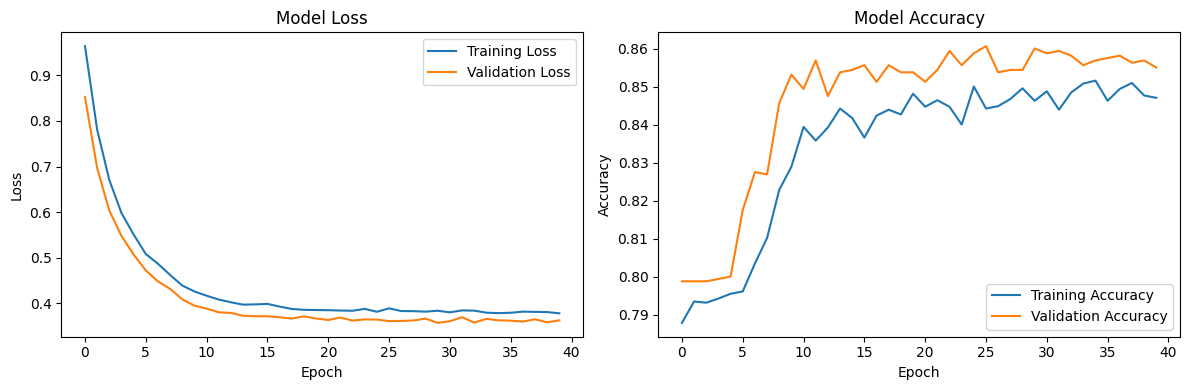

In [21]:
# Plot learning curves for the best model
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(best_history.history['loss'], label='Training Loss')
plt.plot(best_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(best_history.history['accuracy'], label='Training Accuracy')
plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [22]:
# Make predictions with the best model
y_pred = best_model.predict(X_test_scaled)
y_pred_classes = (y_pred > 0.5).astype(int)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [23]:
# Print classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.45      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.86      0.87      0.85      2000



In [24]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))


Confusion Matrix:
[[1553   54]
 [ 215  178]]
